# Word Cloud and Topic Modeling with LDA

In [ ]:
import re
import string
import unicodedata
import warnings
from collections import Counter

import gensim.corpora as corpora
import matplotlib.pyplot as plt
import nltk
import numpy as np
import pandas as pd
import seaborn as sns
from gensim import corpora
from gensim.models import LdaModel

warnings.filterwarnings('ignore')
import os
import sys

sys.path.append(os.path.abspath(".."))

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud, get_single_color_func

sys.path.append(os.path.abspath(".."))
from src.text_cleaning import clean_text_wordcloud_lda
from src.lda import (create_corpus_dictionary,
                     perform_topic_modeling_by_hospital, plot_topic_wordclouds,
                     remove_stopwords_and_tokenize_lda, train_lda)
from src.wordcloud import (plot_wordcloud_by_hospital,
                           remove_stopwords_and_short_wordcloud)

In [2]:
df = pd.read_csv('../data/2_silver/reviews_cleaned.csv')
df

reviewer     date original_language  \
0                    m555  2025-07           English   
1             Joan Rangel  2025-07           Spanish   
2                  juvo92  2025-07             Dutch   
3                      LC  2025-07            French   
4        jutta henckaerts  2025-07             Dutch   
...                   ...      ...               ...   
1825      Line VAN DOOREN  2014-07             Dutch   
1826   Irene von Birgelen  2013-07             Dutch   
1827          Sofie L'Eau  2013-07             Dutch   
1828  Robertina Van Damme  2013-07             Dutch   
1829           Sonny Ardi  2012-07           English   

                                                content      hospital  
0     I had an ivf consultation with a female Prof. ...    UZ Brussel  
1                  Excellent hospital!! I recommend it.    UZ Brussel  
2     Friendly doctors and nurses. I don't really un...    UZ Brussel  
3     I went to UZ Brussel in 2020 for egg cryoprese...    UZ Brussel  
4     The emergency department is horrible. If there...    UZ Brussel  
...                                                 ...           ...  
1825                            good connection top Uza  UZ Antwerpen  
1826  Thanks to the UZA, we have already added 5 yea...  UZ Antwerpen  
1827  Incompetent nurses and an ombudsman service wh...  UZ Antwerpen  
1828                Be pampered again by Frank kine :-)  UZ Antwerpen  
1829       You can take speculos for free and drink tea  UZ Antwerpen  

[1830 rows x 5 columns]

## Word Clouds

In [3]:
custom_stopwords_wordcloud = set(sorted([
    'also', 'already', 'always', 'antwerp', 'antwerpen', 'appointment', 'ask', 'asked', 
    'belgium', 'best', 'brussel', 'brussels', 'call', 'called', 'came', 'come', 'consultation', 
    'day', 'department', 'didnt', 'doctor', 'doctors', 'dont', 'dr', 'emergency', 'even', 'everything', 
    'experience', 'gasthuisberg', 'gent', 'ghent', 'go', 'good', 'heilig hart', 'hospital', 
    'hospitals', 'leuven', 'nurse', 'nurses', 'patient', 'patients', 'people', 'room', 'service', 
    'staff', 'still', 'surgery', 'take', 'time', 'told', 'treatment', 'uz', 'uza', 'well', 
    'went', 'with', 'without'
]))


Creating wordclouds for UZ Brussel...


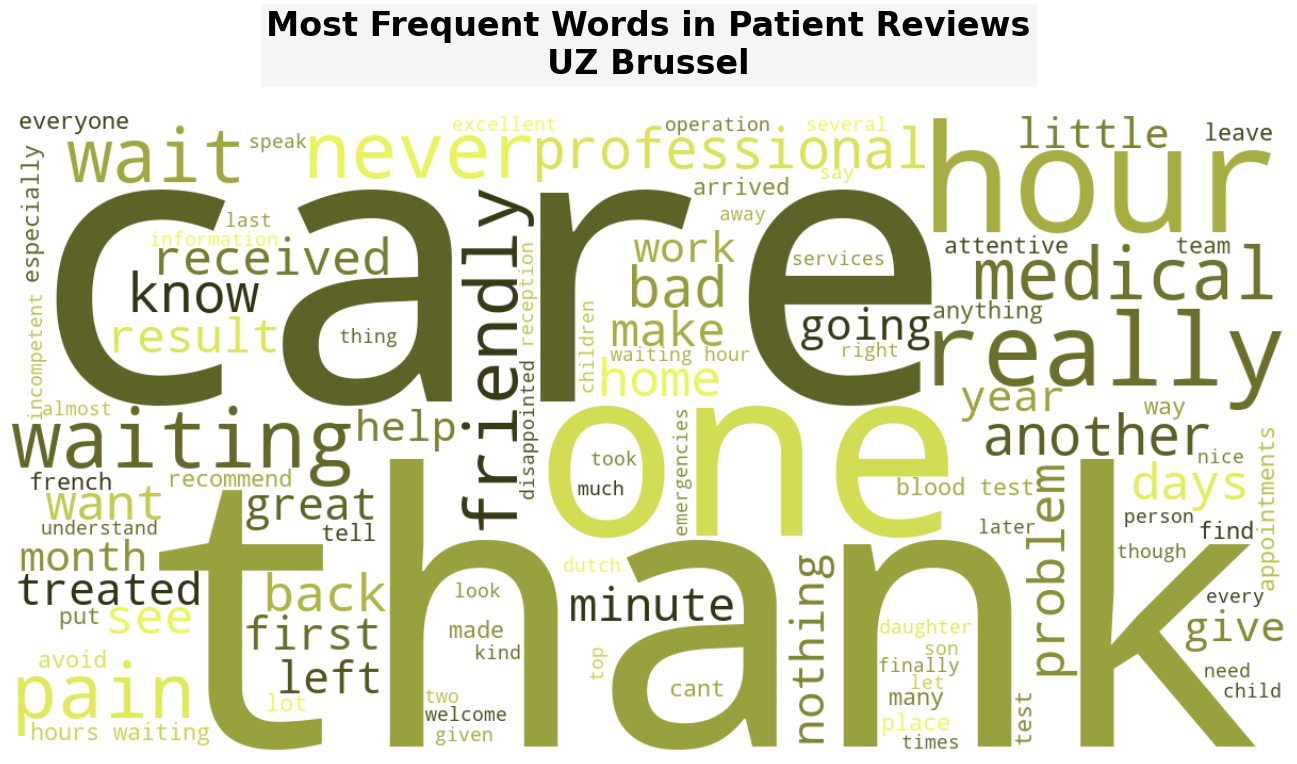


Creating wordclouds for UZ Leuven Pellenberg...


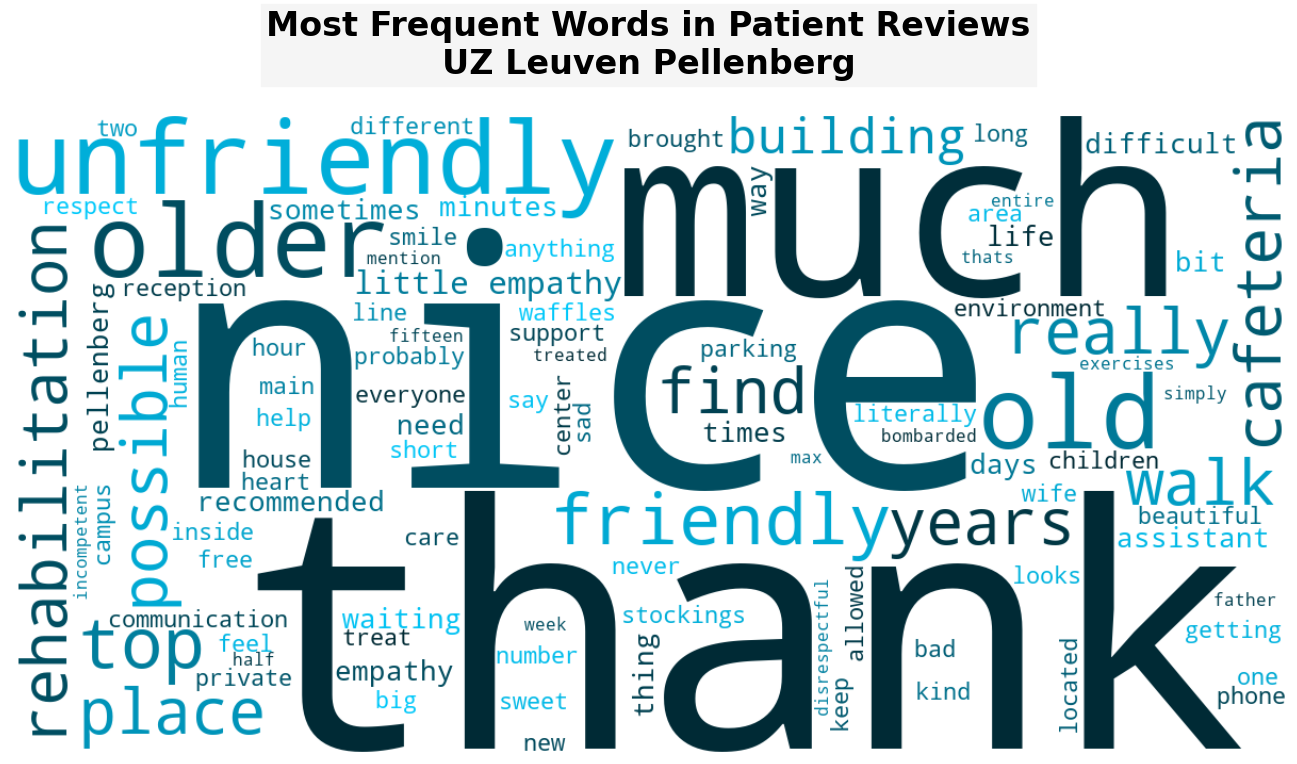


Creating wordclouds for UZ Leuven Gasthuisberg...


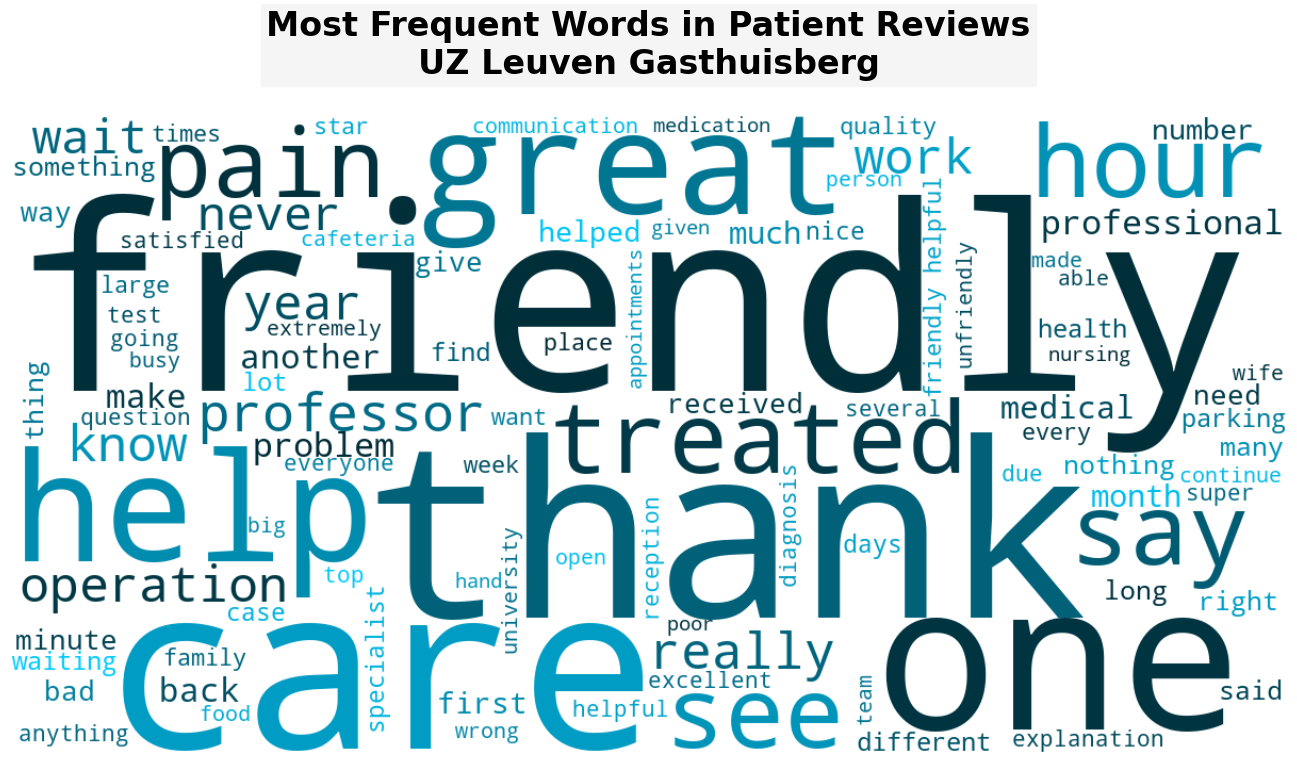


Creating wordclouds for UZ Gent...


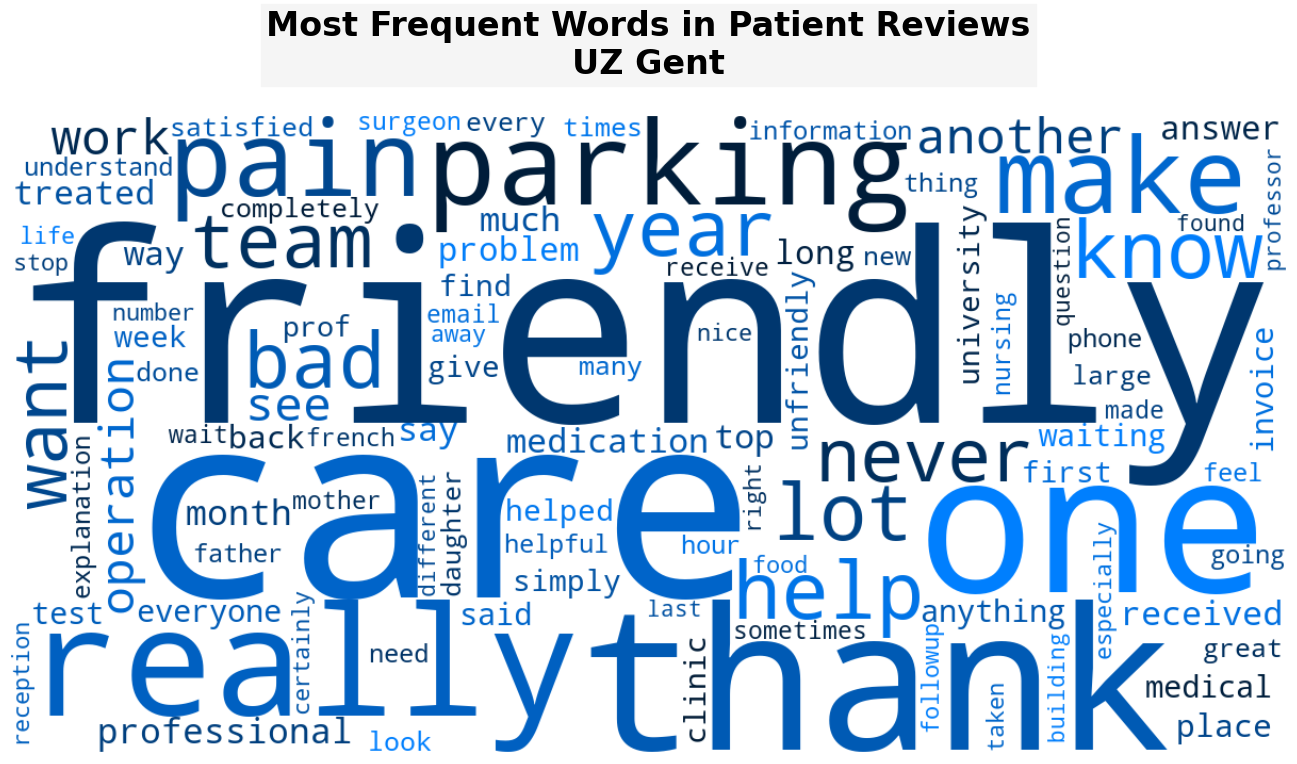


Creating wordclouds for UZ Antwerpen...


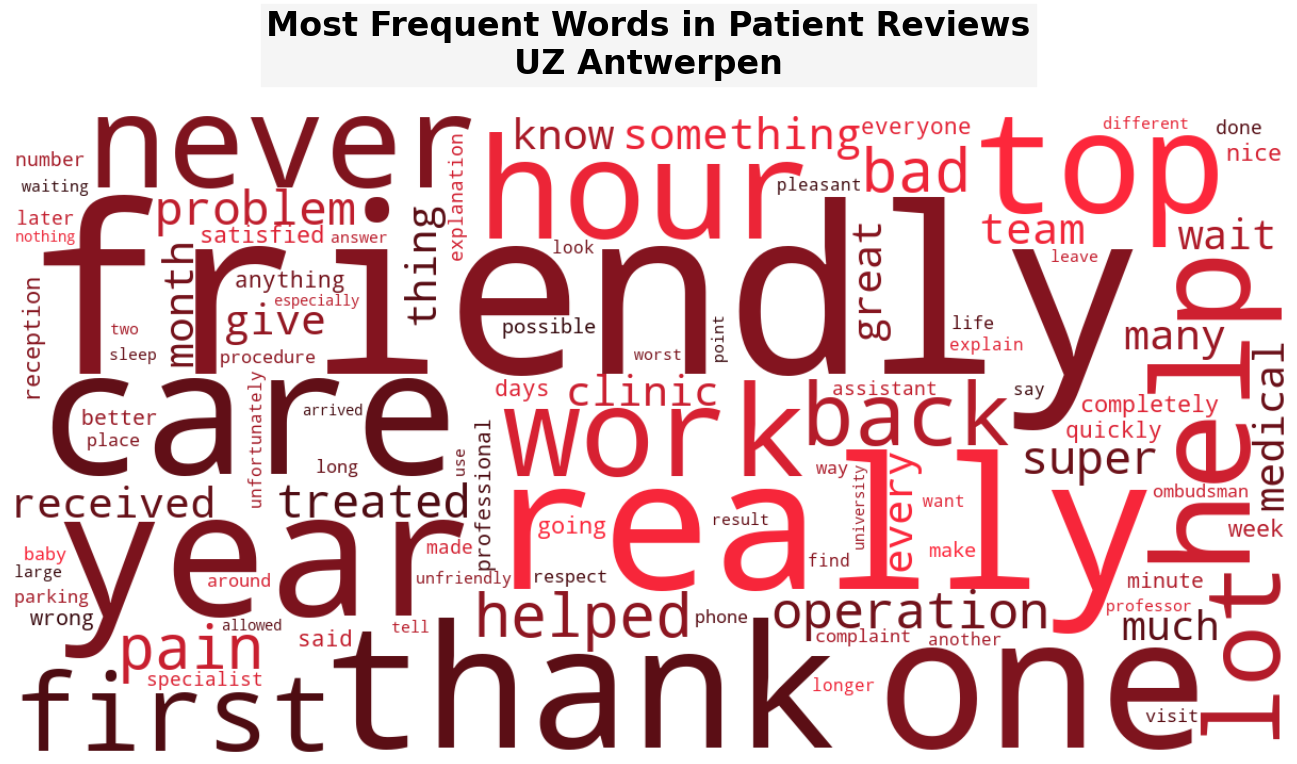

In [4]:
for hospital_name in df['hospital'].unique():
    print(f"\nCreating wordclouds for {hospital_name}...")
    plot_wordcloud_by_hospital(df, hospital_name, custom_stopwords_wordcloud)

## Topic Modeling LDA

In [3]:
custom_stopwords_topic = set(sorted([
    'also', 'already', 'always', 'appointment', 'ask', 'asked', 'back', 'belgium', 'best',
    'brussel', 'brussels', 'call', 'called', 'came', 'come', 'consultation', 'day', 'department',
    'didnt', 'doctor', 'doctors', 'dont', 'dr', 'emergency', 'everything', 'experience',
    'gasthuisberg', 'gent', 'ghent', 'go', 'good', 'hart', 'heilig', 'hospital', 'hospitals',
    'leuven', 'nurse', 'nurses', 'patient', 'patients', 'people', 'room', 'service', 'staff',
    'still', 'surgery', 'take', 'time', 'told', 'treatment', 'uz', 'uza', 'well', 'went', 'with',
    'without', 'get', 'like', 'just', 'one', 'really', 'see', 'say', 'make', 'much', 'first',
    'never', 'know', 'right', 'thing', 'things', 'many', 'now', 'lot', 'feel', 'felt', 'want',
    'maybe', 'might', 'isnt', 'yes', 'oh', 'm', 've', 't', 'thats', 'youre', 'hes', 'im'
]))


Generating topics for UZ Brussel...


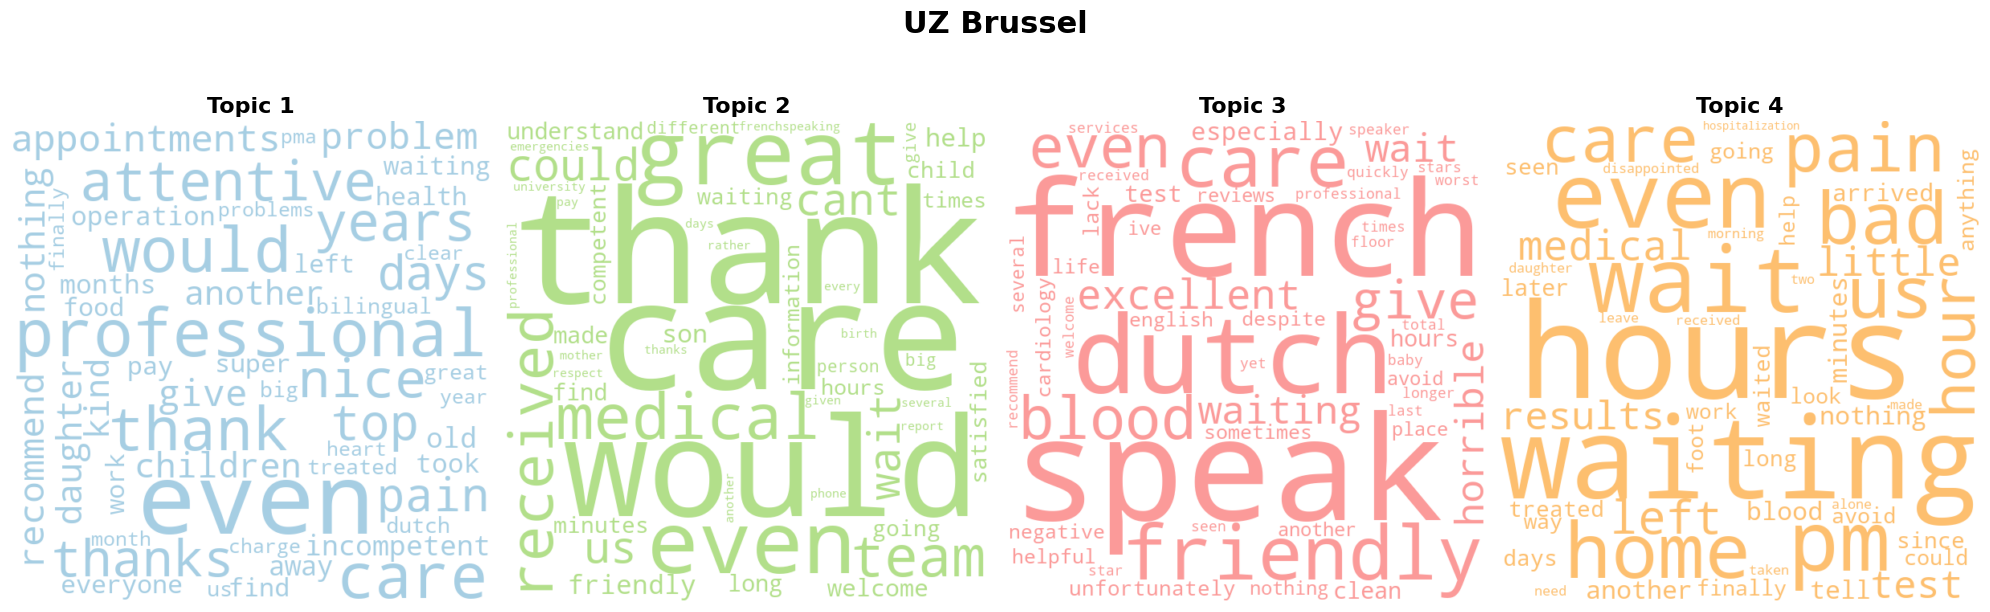


Generating topics for UZ Leuven Pellenberg...


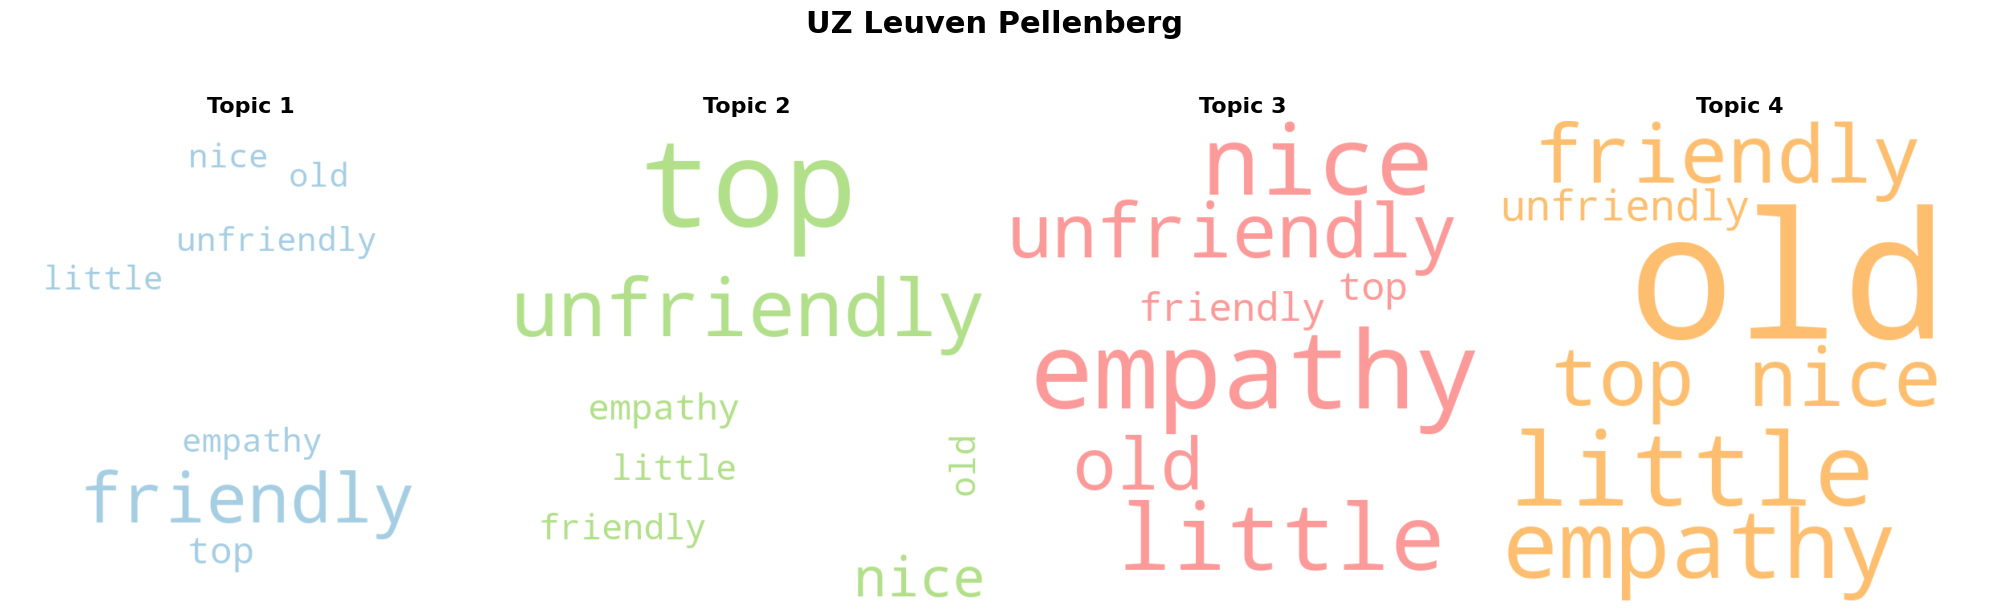


Generating topics for UZ Leuven Gasthuisberg...


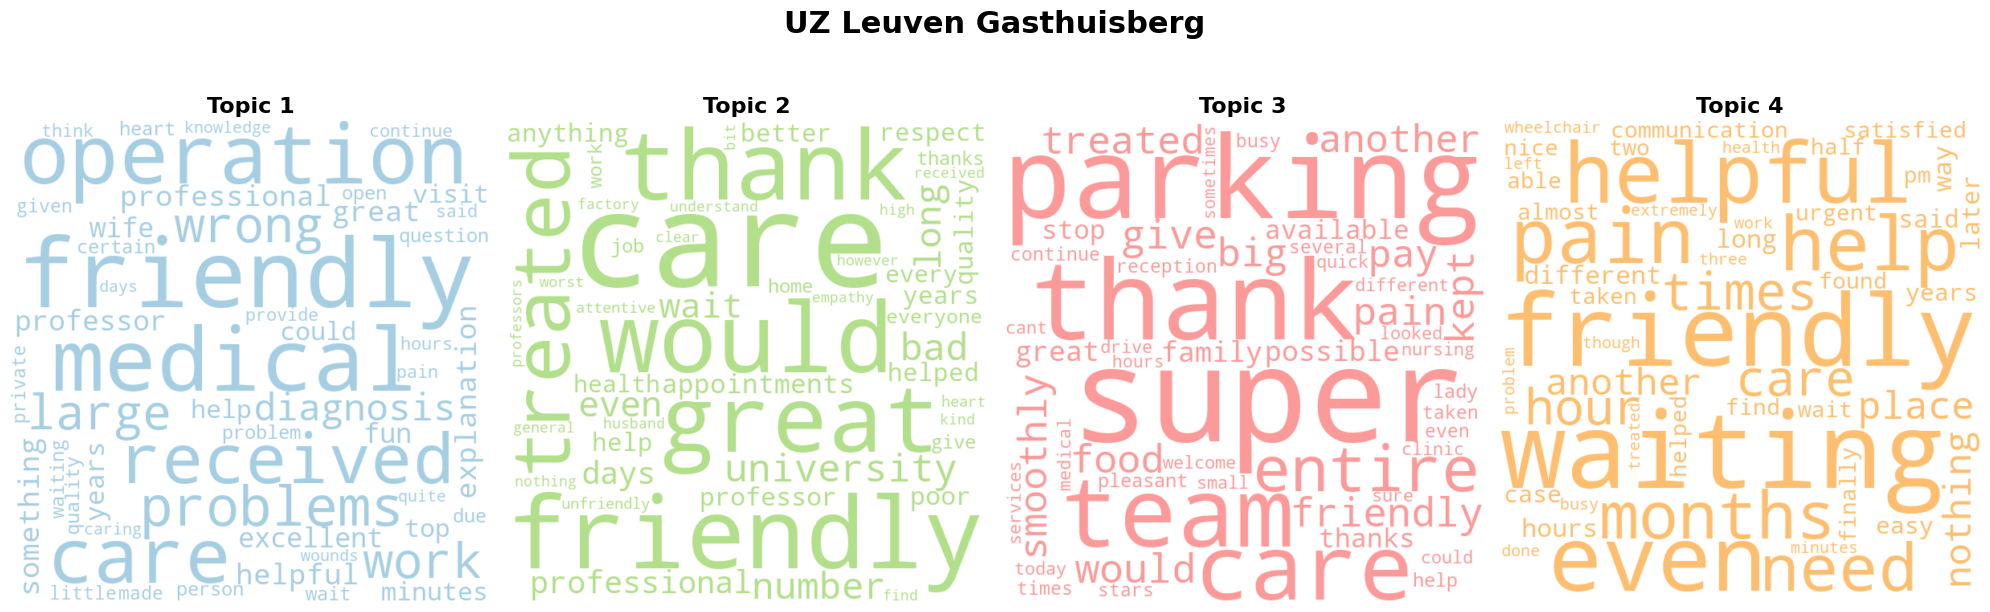


Generating topics for UZ Gent...


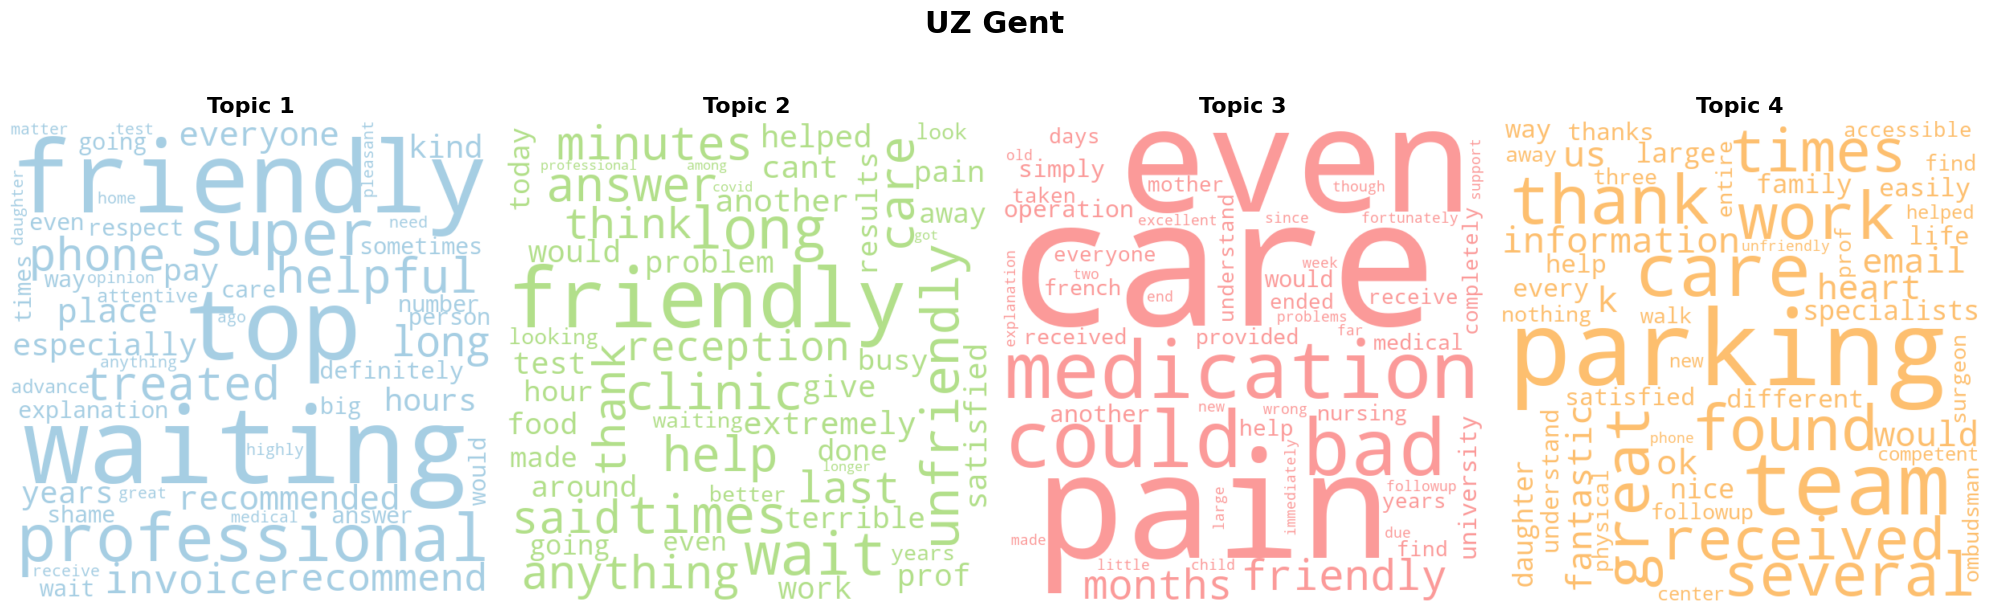


Generating topics for UZ Antwerpen...


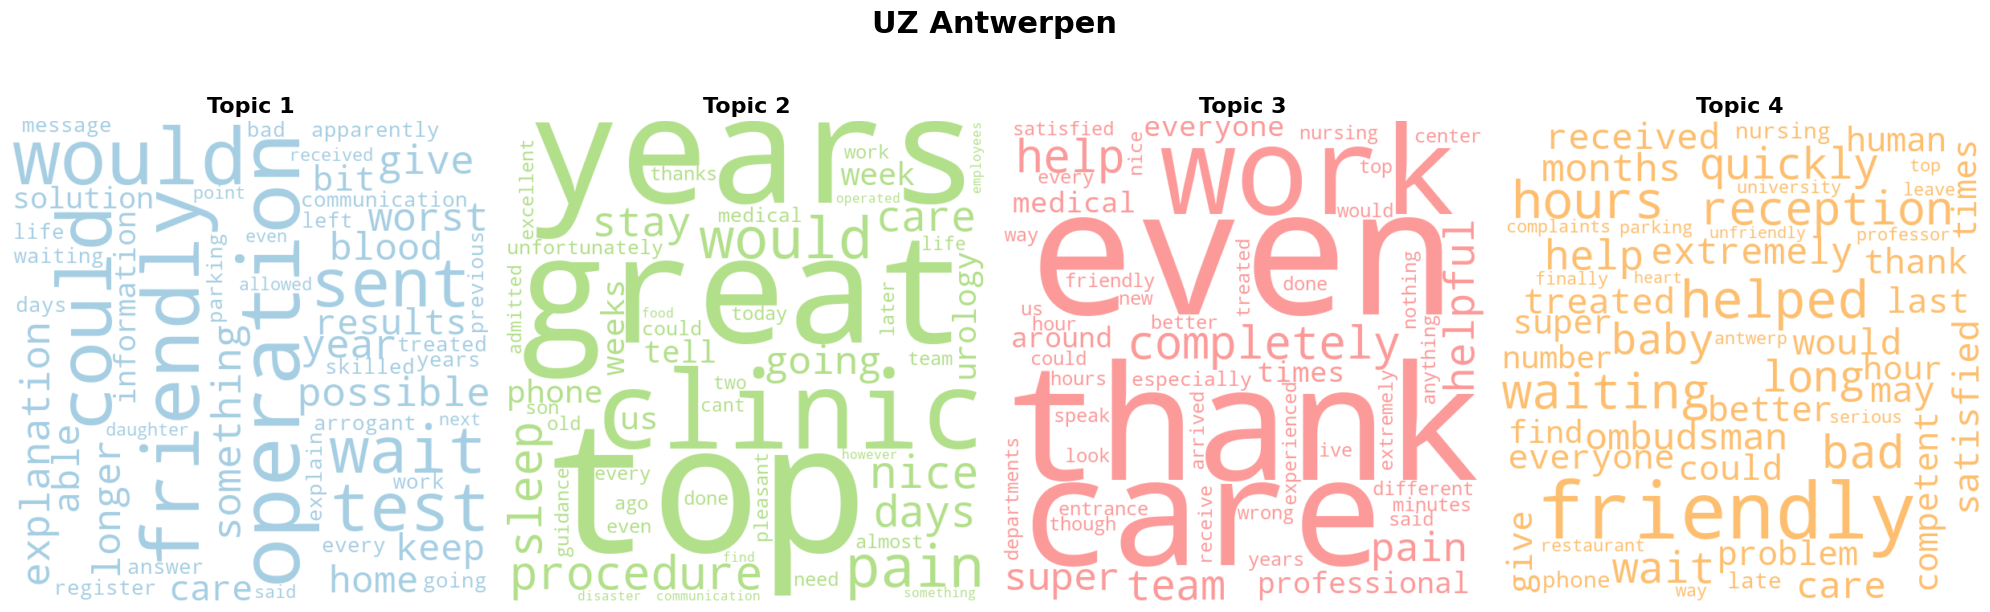

In [4]:
for hospital_name in df['hospital'].unique():

    print(f"\nGenerating topics for {hospital_name}...")
    num_topics = 4
    perform_topic_modeling_by_hospital(
        df=df,
        hospital_name=hospital_name,
        custom_stopwords_lda=custom_stopwords_topic,
        num_topics=num_topics)